In [1]:
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import os
import torch

os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = str(pow(2,40))

In [2]:
import aPack_model
from configs import sentinel_2

/opt/conda/lib/python3.10/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:albumentations.check_version:A new version of Albumentations is available: 1.4.12 (you have 1.4.10). Upgrade using: pip install --upgrade albumentations


/data/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS
time :  2023 1 16 10 51
202301161000_dynamic.csv
/data/00.Data/AIS-CSV-NTO-AO/2차-11개/202301161000_dynamic.csv
#------------------ : csv exists


In [3]:
'''
1. args : 이미지 경로, ais csv 경로, 탐색 옵션 등 매칭 관련 정보들 조절 
2. model_config_file : mmrotate 에서 불러들일 모델에 대한 내용들
3. check_point_file : ckpt 파일경로 
'''

args = sentinel_2
model_config_file = '/root/Ship_Detection_EO/configs/roi_trans.py'
check_point_file = '/root/Ship_Detection_EO/model_ckpts/epoch_9.pth'

In [4]:
args.model_test

True

In [5]:
args.img_path

'/data/00.Data/AO/0-Pusan-2023-AO/C1_20230116015105_10110_00006119_L1G_PS/0-Pusan-2023-AO_3_C1_20230116015105_10110_00006119_L1G.png'

In [6]:
# change img path 

img_root = "/root/Ship_Detection_EO/sat_image/sentinel_2/20230109T021051_20230109T021649_T52SED"
args.img_path = os.path.join( img_root, "RGB.png")

In [7]:
from PIL import Image
import PIL
PIL.Image.MAX_IMAGE_PIXELS = 933120000

def get_image_shape(file_path):
    with Image.open(file_path) as img:
        width, height = img.size
        mode = img.mode

    # Determine the number of channels based on the mode
    if mode == "1":  # 1-bit pixels, black and white, stored with one pixel per byte
        channels = 1
    elif mode == "L":  # 8-bit pixels, grayscale
        channels = 1
    elif mode == "P":  # 8-bit pixels, mapped to any other mode using a color palette
        channels = 1
    elif mode == "RGB":  # 3x8-bit pixels, true color
        channels = 3
    elif mode == "RGBA":  # 4x8-bit pixels, true color with transparency mask
        channels = 4
    elif mode == "CMYK":  # 4x8-bit pixels, color separation
        channels = 4
    elif mode == "YCbCr":  # 3x8-bit pixels, color video format
        channels = 3
    elif mode == "I":  # 32-bit signed integer pixels
        channels = 1
    elif mode == "F":  # 32-bit floating point pixels
        channels = 1
    else:
        raise ValueError(f"Unsupported image mode: {mode}")

    return width, height, channels

# Example usage
file_path = args.img_path
shape = get_image_shape(file_path)
print(f"Width: {shape[0]}, Height: {shape[1]}, Channels: {shape[2]}")


Width: 6585, Height: 3771, Channels: 3


In [8]:
# --------------------------------------------------------------------------------
# model inference
# --------------------------------------------------------------------------------
if args.model_test: 
    result = aPack_model.infer_model(
        input_file_path=args.img_path,
        checkpoint_file=check_point_file,
        config_file=model_config_file,
        thres=args.infer_threshold , 
        gpu_id = 0 )

torch.cuda.empty_cache()

/opt/conda/lib/python3.10/site-packages/mmdet/models/dense_heads/anchor_head.py:116: UserWarning: DeprecationWarning: `num_anchors` is deprecated, for consistency or also use `num_base_priors` instead
  warnings.warn('DeprecationWarning: `num_anchors` is deprecated, '


load checkpoint from local path: /root/Ship_Detection_EO/model_ckpts/epoch_9.pth
#------------------- init detection
# ---- batch_size ---------------------------- # :  64
# ---- image sizes ---------------------------- # :  [512]
# ---- steps ---------------------------- # :  [384]
# ---- ratios ---------------------------- # :  [0.5, 1.0, 1.5]


/opt/conda/lib/python3.10/site-packages/mmdet/models/dense_heads/anchor_head.py:123: UserWarning: DeprecationWarning: anchor_generator is deprecated, please use "prior_generator" instead
  warnings.warn('DeprecationWarning: anchor_generator is deprecated, '


In [9]:
# --------------------------------------------------------------------------------
# Save result
# --------------------------------------------------------------------------------

save_root = img_root
file_name = args.img_path.split("/")[-1].split(".")[0]+".npy"    

if args.model_test == False:
    result = np.load(os.path.join(save_root,file_name))
else:
    print("Result Saved")
    np.save(os.path.join(save_root,file_name), result)

Result Saved


In [10]:
result

[array([[ 7.8294e+02,  7.8801e+02,  9.3598e+00,  8.5126e+00, -4.4197e-02,  3.8770e-01],
        [ 7.8076e+02,  7.7783e+02,  1.1278e+01,  1.1244e+01, -1.4217e-02,  3.0583e-01],
        [ 1.6484e+03,  9.0300e+02,  6.9000e+00,  6.7246e+00, -1.3139e+00,  2.9473e-01],
        [ 6.1876e+02,  5.5430e+02,  2.9751e+01,  2.3378e+01, -6.8928e-02,  2.8406e-01],
        [ 1.6547e+03,  9.0632e+02,  7.0785e+00,  6.5119e+00, -1.4920e+00,  2.4432e-01],
        [ 7.9043e+02,  7.8729e+02,  8.1135e+00,  6.9123e+00,  1.4302e+00,  2.0970e-01],
        [ 7.7279e+02,  7.8216e+02,  8.3618e+00,  7.8114e+00, -1.3592e+00,  1.4731e-01],
        [ 1.0222e+03,  1.5514e+03,  1.3754e+01,  3.4349e+00, -1.1476e+00,  1.0833e-01],
        [ 7.8773e+02,  7.9442e+02,  7.8408e+00,  7.5909e+00,  1.1709e+00,  9.6812e-02],
        [ 1.6487e+03,  9.0923e+02,  6.8464e+00,  6.0616e+00,  1.3874e+00,  7.4923e-02],
        [ 1.6566e+03,  8.9891e+02,  6.3600e+00,  6.0818e+00,  1.4156e+00,  7.4448e-02],
        [ 7.9619e+02,  7.9372e+0

In [11]:
9.1505e-02

0.091505

In [12]:
result[0][0][0]

782.936

In [13]:
result[0][0][1]

788.0083

In [14]:
args.infer_threshold = 0 

#--- inference threshold :  0
#-------------- 0.0769
#-------------- 0.1538
#-------------- 0.2308
#-------------- 0.3077
#-------------- 0.3846
#-------------- 0.4615
#-------------- 0.5385
#-------------- 0.6154
#-------------- 0.6923
#-------------- 0.7692
#-------------- 0.8462
#-------------- 0.9231
#-------------- 1.0000


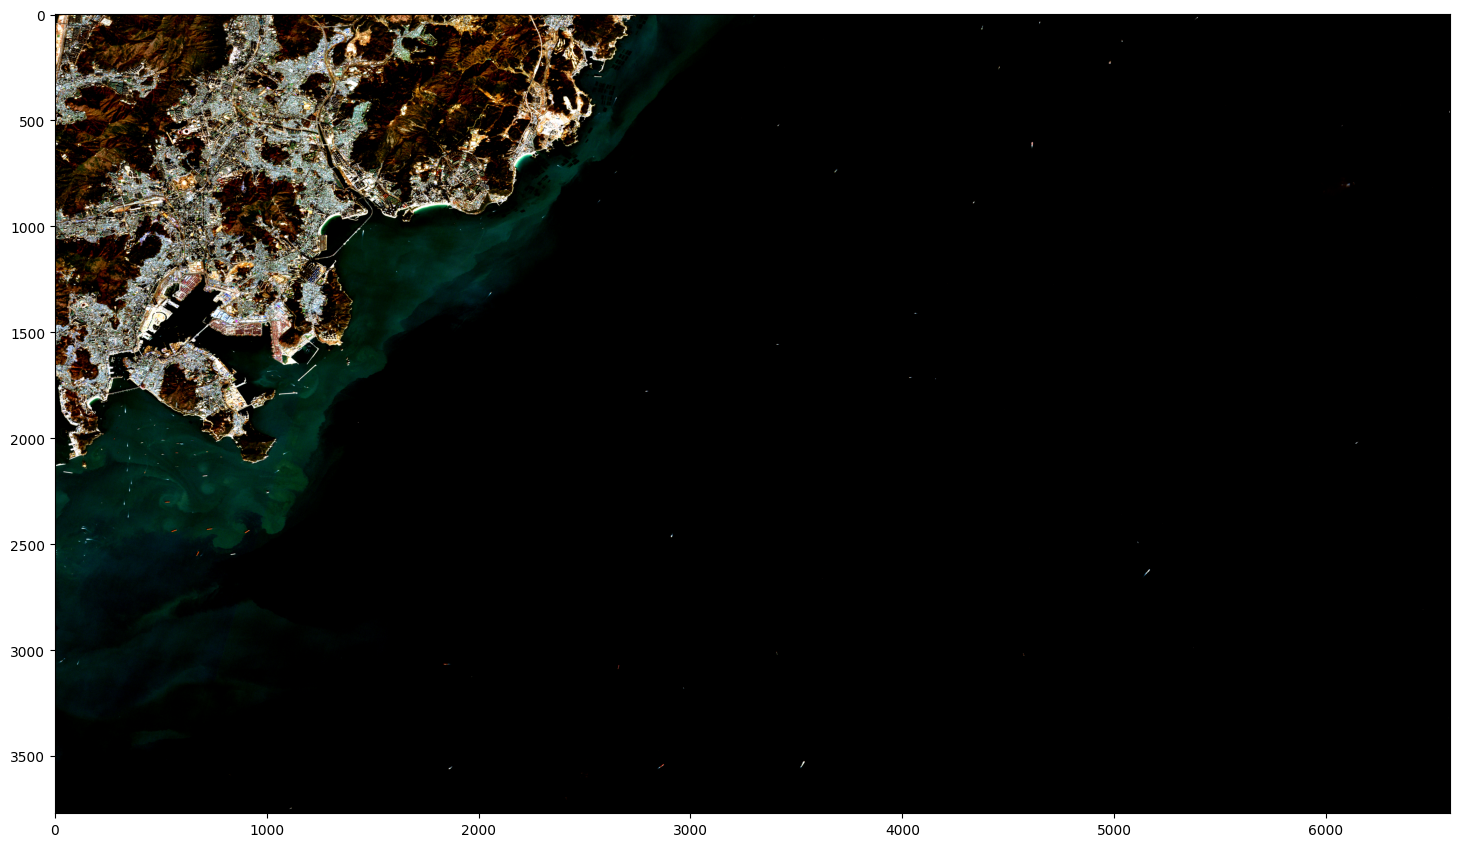

In [15]:
# --------------------------------------------------------------------------------
# Bbox Show and Save 
# --------------------------------------------------------------------------------

img_path = args.img_path
img_ = Image.open(img_path)

bboxes_ = [] 
cnt = 0

print("#--- inference threshold : ", args.infer_threshold)
for r in result[0]:
    if r[-1] > args.infer_threshold:
        cnt+=1
        bboxes_.append(r)

plt.figure(figsize=(18,18))
plt.imshow(img_)

ax = plt.gca()

box_cnt = 0
for box_ in bboxes_:
    box_cnt+=1
    print(f"#-------------- {box_cnt / len(bboxes_):.4f}")
    x = box_[0]
    y = box_[1]
    width = box_[2]
    height = box_[3]
    angle_ = box_[4]

    # model 의 객체좌표가 center 중심인데, patches.Rectangle 은 좌하단을 기준점으로 보기 때문에. x,y 를 아래와 같이 shift 
    # roatate 할 때, 중심좌표 center 로 잡고, angle radian 변환해서 넣어주기 
    path_obj = patches.Rectangle((x-width*0.5,y-height*0.5), width, height, linewidth=0.1, edgecolor="red", fill=False,
                                rotation_point="center",
                                angle=angle_*180/np.pi)
    ax.add_patch(path_obj)



img_file_name = os.path.join( img_root, "bboxed_img.png")   
plt.savefig(img_file_name,dpi =800 )
plt.show()

In [16]:
img_root

'/root/Ship_Detection_EO/sat_image/sentinel_2/20230109T021051_20230109T021649_T52SED'